In [59]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

### Load Data

In [60]:
boston_df = pd.read_csv('datasets/boston.csv')

In [61]:
boston_df.shape

(506, 13)

In [62]:
boston_df.head()

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [63]:
X = boston_df.drop('Median Home Value', axis = 1)
Y = boston_df['Median Home Value']

### Apply variance filter
* When a feature doesn’t vary much within itself, it generally has very little predictive power.

In [64]:
X.var(axis = 0)

crime rate                            73.986578
residential land zone                543.936814
business acres                        47.064442
Charles River                          0.064513
nitric oxides                          0.013428
number of rooms                        0.493671
age                                  792.358399
distances to employment centres        4.434015
accessibility to highways             75.816366
property-tax                       28404.759488
pupil-teacher ratio                    4.686989
lower income levels                   50.994760
dtype: float64

In [65]:
from sklearn.feature_selection import VarianceThreshold

select_features = VarianceThreshold(threshold = 8.0)

In [66]:
X_new = select_features.fit_transform(X)

In [67]:
X_new.shape

(506, 7)

In [68]:
var_df = pd.DataFrame({'feature names' : list(X),
                       'variances' : select_features.variances_
                      })

var_df

,feature names,variances
0,crime rate,73.840360
1,residential land zone,542.861840
2,business acres,46.971430
3,Charles River,0.064385
4,nitric oxides,0.013401
5,number of rooms,0.492695
6,age,790.792473
7,distances to employment centres,4.425252
8,accessibility to highways,75.666531
9,property-tax,28348.623600


In [69]:
X_new = pd.DataFrame(X_new)

X_new.head()

,0,1,2,3,4,5,6
0,0.00632,18.0,2.31,65.2,1.0,296.0,4.98
1,0.02731,0.0,7.07,78.9,2.0,242.0,9.14
2,0.02729,0.0,7.07,61.1,2.0,242.0,4.03
3,0.03237,0.0,2.18,45.8,3.0,222.0,2.94
4,0.06905,0.0,2.18,54.2,3.0,222.0,5.33


In [70]:
selected_features = []

for i in range(len(X_new.columns)):
    for j in range(len(X.columns)):

        if(X_new.iloc[:,i].equals( X.iloc[:,j])):
            selected_features.append(X.columns[j])
            
selected_features

['crime rate',
 'residential land zone',
 'business acres',
 'age',
 'accessibility to highways',
 'property-tax',
 'lower income levels']

In [71]:
rejected_features = set(list(X)) - set(selected_features)

rejected_features

{'Charles River',
 'distances to employment centres',
 'nitric oxides',
 'number of rooms',
 'pupil-teacher ratio'}

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.2)

In [73]:
x_train.shape, y_train.shape

((404, 7), (404,))

In [74]:
x_test.shape, y_test.shape

((102, 7), (102,))

### Regression in Statsmodel

https://www.statsmodels.org/stable/regression.html

In [75]:
x_train_with_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_train_with_const)

In [76]:
result = model.fit()

In [77]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      Median Home Value   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     80.21
Date:                Sun, 10 Mar 2019   Prob (F-statistic):           5.42e-72
Time:                        10:25:11   Log-Likelihood:                -1284.6
No. Observations:                 404   AIC:                             2585.
Df Residuals:                     396   BIC:                             2617.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.3470      1.384     24.808      0.0

### Build Linear Regression Model

In [78]:
reg_model = LinearRegression().fit(x_train, y_train)

### Evaluate Model

In [79]:
print('Training score: ', reg_model.score(x_train, y_train))

Training score:  0.5864157041301283


In [80]:
y_pred = reg_model.predict(x_test)

In [81]:
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.5854773306078116


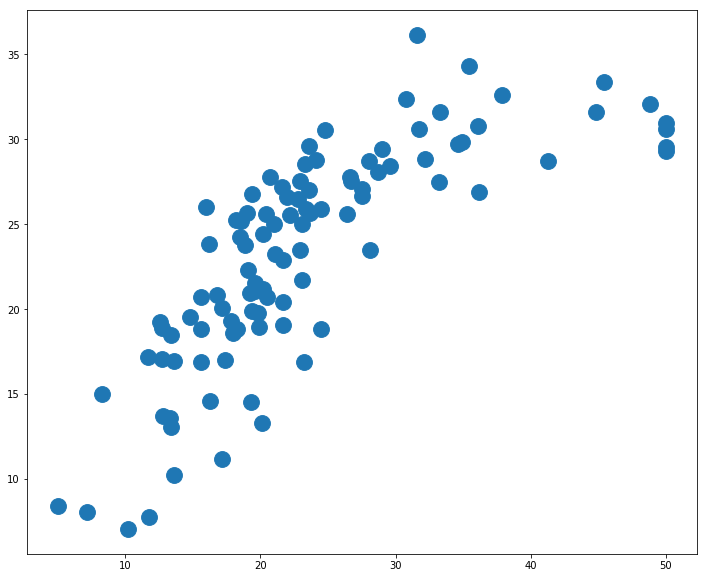

In [82]:
plt.figure(figsize = (12, 10))

plt.scatter(y_test.values, y_pred, s=250)

plt.show()